**DS4A CAPSTONE PROJECT: An In-Depth Look on How Food Deserts Affect Minority Communities in Louisiana**

Team #37 |  Chiugo Ezekwem, Jasmin Alvarez, John Tsirigotis, Melanie Dakwa, Nelson Adeniji and Ryan Roberts

In [1]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


Before delving deeper into our exploratory analysis, we need to clearly define what exactly a food desert is.
What is a food desert?

Food deserts are regions where the residents have limited or no access to fresh, healthy and affordable food. This may be due to having a low income or far distance to find healthy food options. Since low access to healthy food is defined as living far from 
grocery stores, supermarkets etc. A census tract is considered to have low access if a significant number or share of individuals in the tract is far from a supermarket.

According to the USDA, Food Access Research Atlas, a low-income census tract is defined as any tract where:

- "The tract’s poverty rate is 20 percent or greater; or
-  The tract’s median family income is less than or equal to 80 percent of the State-wide median family income; or
-  The tract is in a metropolitan area and has a median family income less than or equal to 80 percent of the metropolitan   area's median family income."

In order to qualify as a food desert, an area must also meet at least one  USDA criteria "Three measures of food access based on distance to a supermarket are provided in the Atlas:
 
- Low-income census tracts where a significant number (at least 500 people) or share (at least 33 percent) of the population is greater than ½ mile from the nearest supermarket, supercenter, or large grocery store for an urban area or greater than 10 miles for a rural area. 
- Low-income census tracts where a significant number (at least 500 people) or share (at least 33 percent) of the population is greater than 1.0 mile from the nearest supermarket, supercenter, or large grocery store for an urban area or greater than 10 miles for a rural area. 
- Low-income census tracts where a significant number (at least 500 people) or share (at least 33 percent) of the population is greater than 1.0 mile from the nearest supermarket, supercenter, or large grocery store for an urban area or greater than 20 miles for a rural area."

For the purposes of our analysis and based on our datasets, we can narrow our food deserts criteria on 
- The areas where the poverty rate is at least 20% or greater and 
- Urban areas where the low income census tracts have at last 500 people or 33% of the population living greater than 1 mile from the nearest supermarket, or grocery store. or 
- Rural areas where the low income census tracts have at last 500 people or 33% of the population living greater than 10 miles from the nearest supermarket or grocery store.




In [51]:
import pandas as pd
import numpy as np # used for a number of mathematical calculations
import matplotlib.pyplot as plt # used for making plots
import geopandas as gpd # used for working with geographic data
from shapely.ops import unary_union # used for merging shape objects
import fiona
import os 
import pingouin as pg

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

The first step to our analysis would be to download the census tract information from the Census Tiger, Shape Files, https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=Census+Tracts just to get the geographical
co-ordinates to plot the map boundaries of Louisiana before moving forward with the analysis. U.S. Census was used because this was the most upto date information

In [4]:
#read the census tracts for Louisiana ... extracted from the zip file
louisiana_tracts_ = gpd.read_file("C:/Users/chiugo/Downloads/tl_2019_22_tract/tl_2019_22_tract.shp")
louisiana_tracts_


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,22,065,960500,22065960500,9605,Census Tract 9605,G5020,S,3552216,0,+32.3968264,-091.1914756,"POLYGON ((-91.20568 32.39585, -91.20563 32.395..."
1,22,071,001747,22071001747,17.47,Census Tract 17.47,G5020,S,7166914,344001,+30.0414373,-089.9549478,"POLYGON ((-89.97631 30.03712, -89.97611 30.037..."
2,22,071,001750,22071001750,17.50,Census Tract 17.50,G5020,S,1437944,166340,+30.0384832,-089.9176831,"POLYGON ((-89.93001 30.03690, -89.92982 30.036..."
3,22,109,000900,22109000900,9,Census Tract 9,G5020,S,5541536,301932,+29.5904500,-090.7187865,"POLYGON ((-90.74418 29.56766, -90.74329 29.567..."
4,22,083,970500,22083970500,9705,Census Tract 9705,G5020,S,55801361,346622,+32.4835210,-091.7502362,"POLYGON ((-91.82030 32.49491, -91.82014 32.496..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,22,055,001904,22055001904,19.04,Census Tract 19.04,G5020,S,5254974,0,+30.1958830,-092.0836108,"POLYGON ((-92.09217 30.20548, -92.09217 30.206..."
1144,22,055,001905,22055001905,19.05,Census Tract 19.05,G5020,S,32352161,0,+30.1541953,-092.1178169,"POLYGON ((-92.15014 30.13706, -92.14840 30.137..."
1145,22,055,001407,22055001407,14.07,Census Tract 14.07,G5020,S,6077083,0,+30.1761616,-092.0362015,"POLYGON ((-92.05580 30.16264, -92.05402 30.164..."
1146,22,055,001500,22055001500,15,Census Tract 15,G5020,S,5415227,0,+30.1985775,-092.0283360,"POLYGON ((-92.05360 30.20157, -92.05345 30.201..."


In [5]:
#
louisiana_tracts_.iloc[0,:]

STATEFP                                                    22
COUNTYFP                                                  065
TRACTCE                                                960500
GEOID                                             22065960500
NAME                                                     9605
NAMELSAD                                    Census Tract 9605
MTFCC                                                   G5020
FUNCSTAT                                                    S
ALAND                                                 3552216
AWATER                                                      0
INTPTLAT                                          +32.3968264
INTPTLON                                         -091.1914756
geometry    POLYGON ((-91.205681 32.395851, -91.2056269999...
Name: 0, dtype: object

In [6]:
louisiana_tracts_.describe()


,ALAND,AWATER
count,1.148000e+03,1.148000e+03
mean,9.747309e+07,2.068990e+07
std,2.044062e+08,1.412765e+08
min,0.000000e+00,0.000000e+00
25%,1.965014e+06,0.000000e+00
50%,8.243313e+06,1.218580e+05
75%,8.353711e+07,1.596426e+06
max,2.011834e+09,2.413322e+09


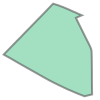

In [7]:
#Use LOC just to get the shape of the tract 
tract =louisiana_tracts_.loc[0, 'geometry']
tract

<AxesSubplot:>

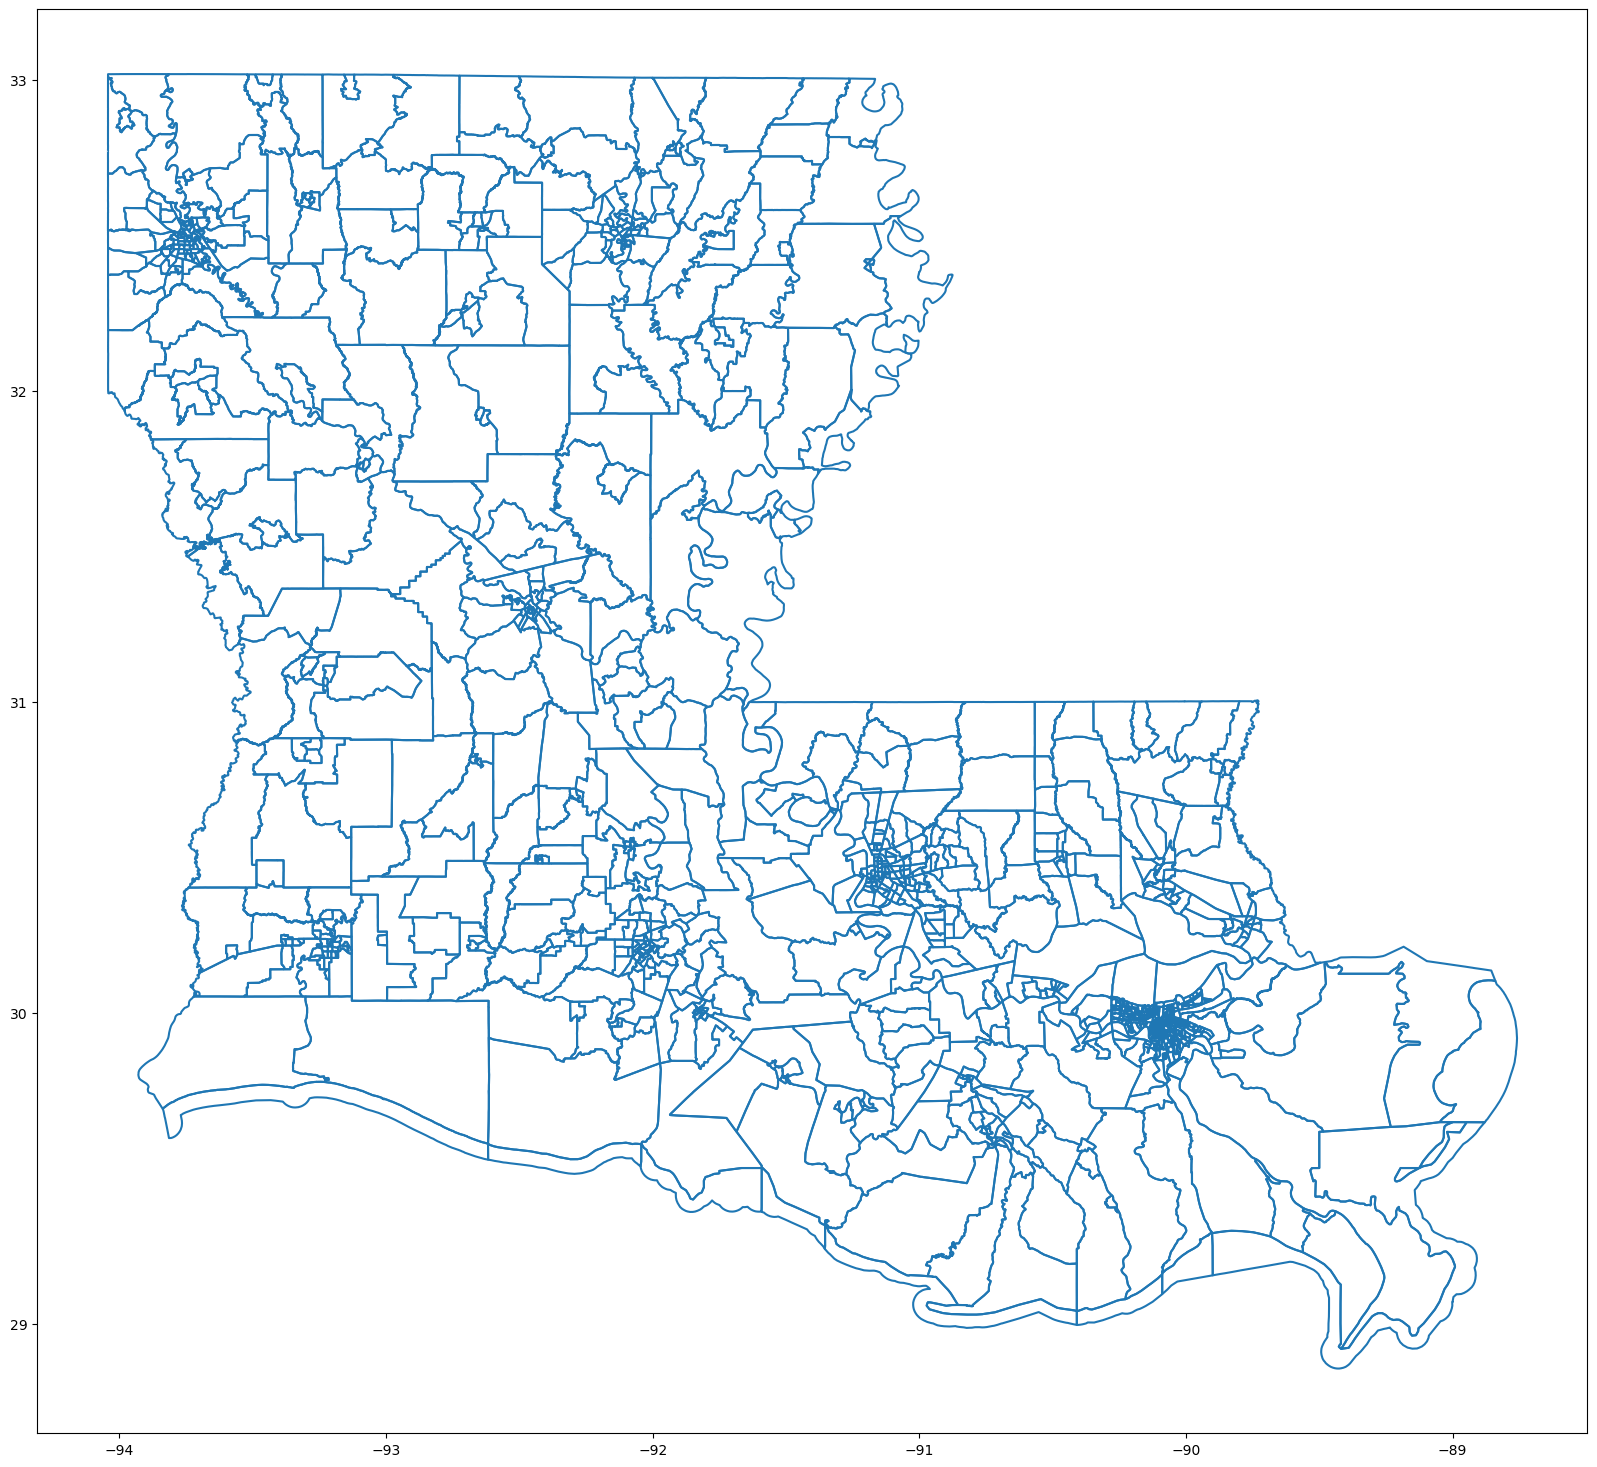

In [8]:
#CRS is Coordinate reference system that geopandas to standardize the CRS for the plotting of the maps. 
#According to https://geopandas.org/en/stable/docs/user_guide/projections.html, "EPSG:4326" is common one for latitude-longitude
#projection and plot map of louisiana's boundaries
louisiana_tracts_.crs= "EPSG:4326"
louisiana_tracts_.boundary.plot(figsize = (20, 20))

Now that we have the boundaries of the map of Louisiana, we would need to define what a food desert is based on USDA measures indicated above. For that we need to use the food desert s in U.S. dataset opened below: 

In [9]:
food_deserts_in_america = pd.read_csv(r"C:\Users\chiugo\OneDrive\Documents\food_access_research_atlas.csv")
#Retrieve Louisiana food deserts since that is our focus.
food_deserts_Louisiana = food_deserts_in_america[food_deserts_in_america["State"] == "Louisiana"]


In [10]:
#drop variables that are unnecssary for our analysis since this is a big dataset. 
keeplist = ["CensusTract","State","County","Urban","POP2010",\
            "OHU2010","GroupQuartersFlag","NUMGQTRS","PCTGQTRS","LILATracts_1And10",\
            "LILATracts_halfAnd10","LILATracts_1And20","LILATracts_Vehicle","HUNVFlag",\
            "LowIncomeTracts","PovertyRate","MedianFamilyIncome","TractLOWI","TractKids",\
            "TractSeniors","TractWhite","TractBlack","TractAsian","TractNHOPI","TractAIAN",\
            "TractOMultir","TractHispanic","TractHUNV","TractSNAP","lawhite1", "lablack1",\
            "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1", "lawhite10", "lablack10",\
            "laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10"

           
           ]

food_deserts_Louisiana= food_deserts_Louisiana[keeplist]
food_deserts_Louisiana.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,laaian1,laomultir1,lahisp1,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10
28228,22001960100,Louisiana,Acadia,1,6213,2345,0,133,0.021407,1,...,3.183696,21.936462,17.422600,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
28229,22001960200,Louisiana,Acadia,0,5988,2144,0,0,0.000000,0,...,11.000000,133.538713,153.057078,136.462144,0.000000,0.0,0.0,0.000000,0.000000,0.000000
28230,22001960300,Louisiana,Acadia,0,3582,1286,0,69,0.019263,0,...,16.000000,59.000000,61.999999,170.734426,10.748547,0.0,0.0,0.003822,2.782964,4.193329
28231,22001960400,Louisiana,Acadia,0,6584,2362,0,52,0.007898,0,...,18.000000,92.000000,75.000000,280.163331,14.601632,0.0,0.0,2.005272,8.468819,9.539906
28232,22001960500,Louisiana,Acadia,0,6093,2178,0,43,0.007057,0,...,15.977574,91.653137,97.327503,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [11]:
#Changed the name from "census tracts" to "Geoid" so that we can merge on that variable and changed the data types to string
food_deserts_Louisiana.rename(columns = {'CensusTract':'GEOID'}, inplace = True)
food_deserts_Louisiana["GEOID"] = food_deserts_Louisiana["GEOID"].astype("str")
food_deserts_Louisiana.dtypes

GEOID                    object
State                    object
County                   object
Urban                     int64
POP2010                   int64
OHU2010                   int64
GroupQuartersFlag         int64
NUMGQTRS                  int64
PCTGQTRS                float64
LILATracts_1And10         int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LILATracts_Vehicle        int64
HUNVFlag                  int64
LowIncomeTracts           int64
PovertyRate             float64
MedianFamilyIncome        int64
TractLOWI                 int64
TractKids                 int64
TractSeniors              int64
TractWhite                int64
TractBlack                int64
TractAsian                int64
TractNHOPI                int64
TractAIAN                 int64
TractOMultir              int64
TractHispanic             int64
TractHUNV                 int64
TractSNAP                 int64
lawhite1                float64
lablack1                float64
laasian1

In [46]:
#Changing distance from supermarkets from float to int.
food_deserts_Louisiana[["lawhite1", "lablack1",\
            "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1", "lawhite10", "lablack10",\
            "laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10"
]]= food_deserts_Louisiana[["lawhite1", "lablack1",\
            "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1", "lawhite10", "lablack10",\
            "laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10"
]].astype(int)

In [47]:
#Merging both datasets 
louisiana_food_deserts= louisiana_tracts_.merge(food_deserts_Louisiana,how="outer", on = "GEOID")


louisiana_food_deserts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,laaian1,laomultir1,lahisp1,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10
0,22,065,960500,22065960500,9605,Census Tract 9605,G5020,S,3552216,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,071,001747,22071001747,17.47,Census Tract 17.47,G5020,S,7166914,344001,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,071,001750,22071001750,17.50,Census Tract 17.50,G5020,S,1437944,166340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,109,000900,22109000900,9,Census Tract 9,G5020,S,5541536,301932,...,53.0,120.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,083,970500,22083970500,9705,Census Tract 9705,G5020,S,55801361,346622,...,17.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Merging both datasets 
louisiana_food_deserts= louisiana_tracts_.merge(food_deserts_Louisiana,how="outer", on = "GEOID")


louisiana_food_deserts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,laaian1,laomultir1,lahisp1,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10
0,22,065,960500,22065960500,9605,Census Tract 9605,G5020,S,3552216,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,071,001747,22071001747,17.47,Census Tract 17.47,G5020,S,7166914,344001,...,0.331619,4.763398,3.726776,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,22,071,001750,22071001750,17.50,Census Tract 17.50,G5020,S,1437944,166340,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22,109,000900,22109000900,9,Census Tract 9,G5020,S,5541536,301932,...,53.940019,120.601448,150.071091,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,083,970500,22083970500,9705,Census Tract 9705,G5020,S,55801361,346622,...,17.441378,28.903183,28.806381,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
louisiana_food_deserts.shape

(1148, 55)

In [14]:
#Checking for missing values in the merged dataset
louisiana_food_deserts["OHU2010"].isna()
louisiana_food_deserts[louisiana_food_deserts["OHU2010"].isna()]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,laaian1,laomultir1,lahisp1,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10
101,22,113,990000,22113990000,9900,Census Tract 9900,G5020,S,0,299825019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,22,109,990000,22109990000,9900,Census Tract 9900,G5020,S,0,553928555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,22,045,990000,22045990000,9900,Census Tract 9900,G5020,S,0,437047769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,22,101,990000,22101990000,9900,Census Tract 9900,G5020,S,0,189391417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,22,057,990000,22057990000,9900,Census Tract 9900,G5020,S,0,174985877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Dropped NAN values because compared to the dataset of 1148, there are 5 rows which is about 0.004% of the data missing
louisiana_food_deserts = louisiana_food_deserts.dropna()
louisiana_food_deserts.head(50)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,laaian1,laomultir1,lahisp1,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10
0,22,065,960500,22065960500,9605,Census Tract 9605,G5020,S,3552216,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,22,071,001747,22071001747,17.47,Census Tract 17.47,G5020,S,7166914,344001,...,0.331619,4.763398,3.726776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,22,071,001750,22071001750,17.50,Census Tract 17.50,G5020,S,1437944,166340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,22,109,000900,22109000900,9,Census Tract 9,G5020,S,5541536,301932,...,53.940019,120.601448,150.071091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,22,083,970500,22083970500,9705,Census Tract 9705,G5020,S,55801361,346622,...,17.441378,28.903183,28.806381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,22,083,970100,22083970100,9701,Census Tract 9701,G5020,S,22522354,287704,...,2.193828,7.406425,3.205590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,22,083,970600,22083970600,9706,Census Tract 9706,G5020,S,476835017,3913456,...,9.000000,40.000000,54.000000,487.104937,117.603699,0.102521,0.000000,0.094366,3.377464,8.147736
7,22,083,970300,22083970300,9703,Census Tract 9703,G5020,S,317875441,729805,...,3.000000,33.863891,45.455562,111.669513,9.121157,0.000000,0.000000,0.000000,2.415736,3.220981
8,22,083,970400,22083970400,9704,Census Tract 9704,G5020,S,352897900,8141444,...,9.000000,29.000000,61.000000,67.395121,12.403906,5.000000,0.000000,0.000000,0.000000,1.838669
9,22,083,970200,22083970200,9702,Census Tract 9702,G5020,S,213397127,9365591,...,4.000000,35.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now that the food deserts dataset has been merged and cleaned, based on the criteria to properly define a food desert, we would need to know two things: 
- If a census tract is low income
- Location of source of fresh food, supermarkets etc. in rural and urban regions

First, identifying and mapping the low census tracts i.e. regions with poverty rate> 20 is necessary. 
Since we are interested in if a tract can be classified as "low income",  i.e. above 20% poverty, a new column has been added that indicates if a tract is above or below 20%. 



In [16]:
#Creating a new column with the condition of whether a tract is above 20% will return a boolean (True/False). 
#Then the results are converted to integers, where True becomes 1 and False becomes 0
louisiana_food_deserts["poverty_above_20pct"]= (louisiana_food_deserts["PovertyRate"]>= 20).astype(int)
louisiana_food_deserts["poverty_above_20pct"]

0       1
1       0
2       1
3       0
4       1
       ..
1143    0
1144    0
1145    0
1146    0
1147    0
Name: poverty_above_20pct, Length: 1143, dtype: int32

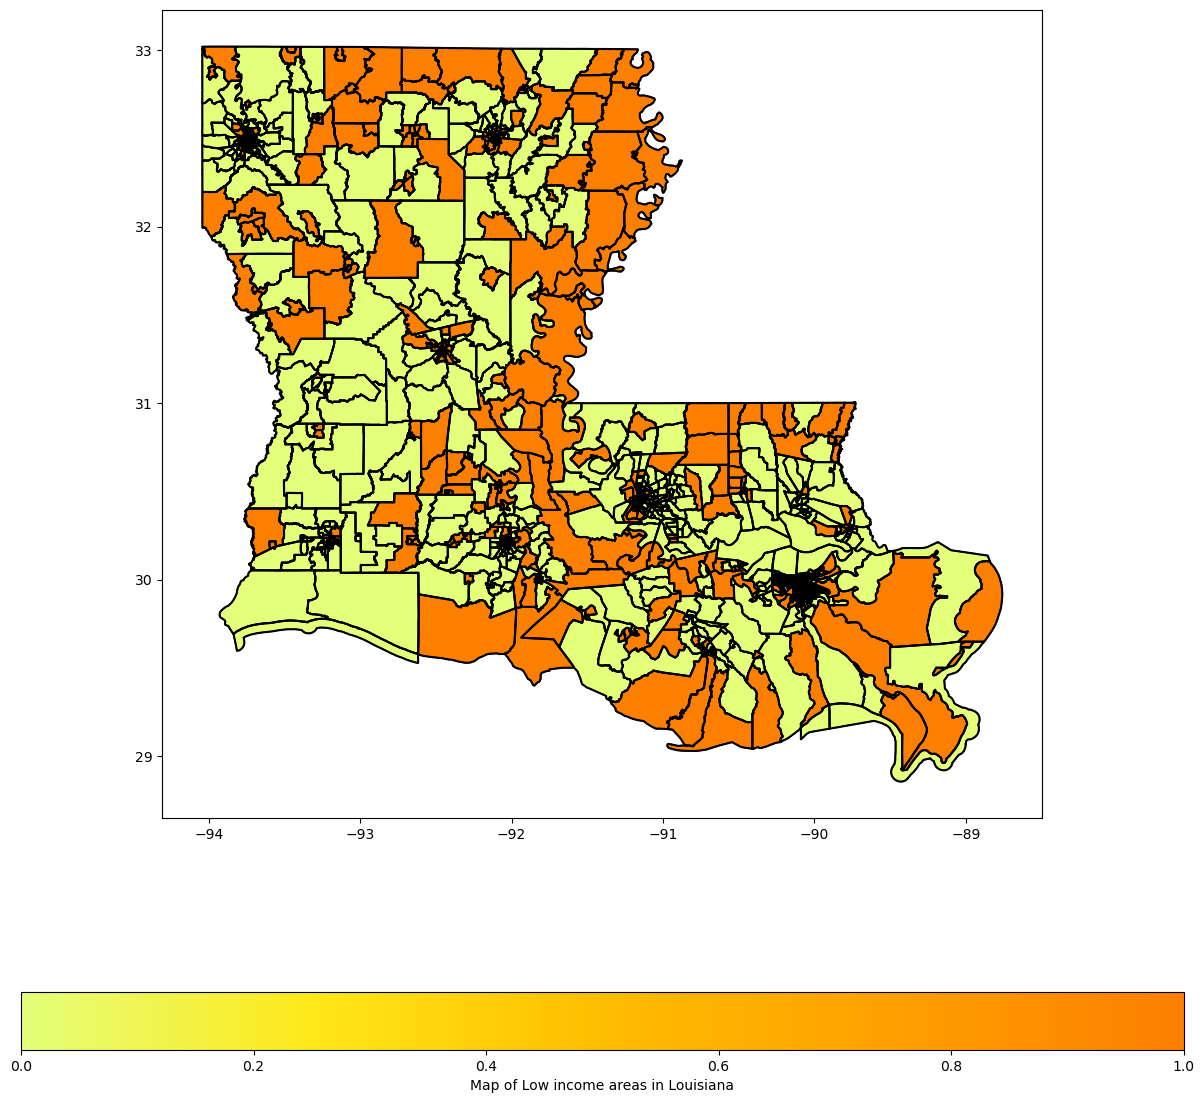

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 15))

ax= louisiana_food_deserts.plot(column="poverty_above_20pct",cmap='Wistia', ax=ax,legend=True,edgecolor = 'black',
           legend_kwds={"label":"Map of Low income areas in Louisiana", 'orientation':"horizontal"})
ax = louisiana_food_deserts.boundary.plot(ax=ax, color= "black" )


The tracts in orange are the low income regions with poverty rate at least 20% and the tracts in yellow are the regions with poverty rate below 20%

The next step would be to display the proximity to fresh foods via supermarkets. However, in urban or rural areas, the definition of a food desert is different. Urban areas look for grocery stores within 1 mile while  rural areas look for grocery stores within 10 miles. 

In order to visualize the map of the food deserts in Louisiana, we would need the food desert variable that accounts for both low income and low access to supermarkets, the USDA ERS flag for food desert regions is the LILATracts_1And10 variable means low income and low access tracts whose distance to supermarkets are measured at 1 mile for urban areas and 10 miles for rural areas and it accounts for:  
- Poverty level in a census tract is >= 20% (low income)
- Low access to fresh food i.e. the distance from the supermarket,i.e., >1 mile from a fresh food source in urban areas or >10 miles for rural areas

The results were converted to integers, where True becomes 1 and False becomes 0. 




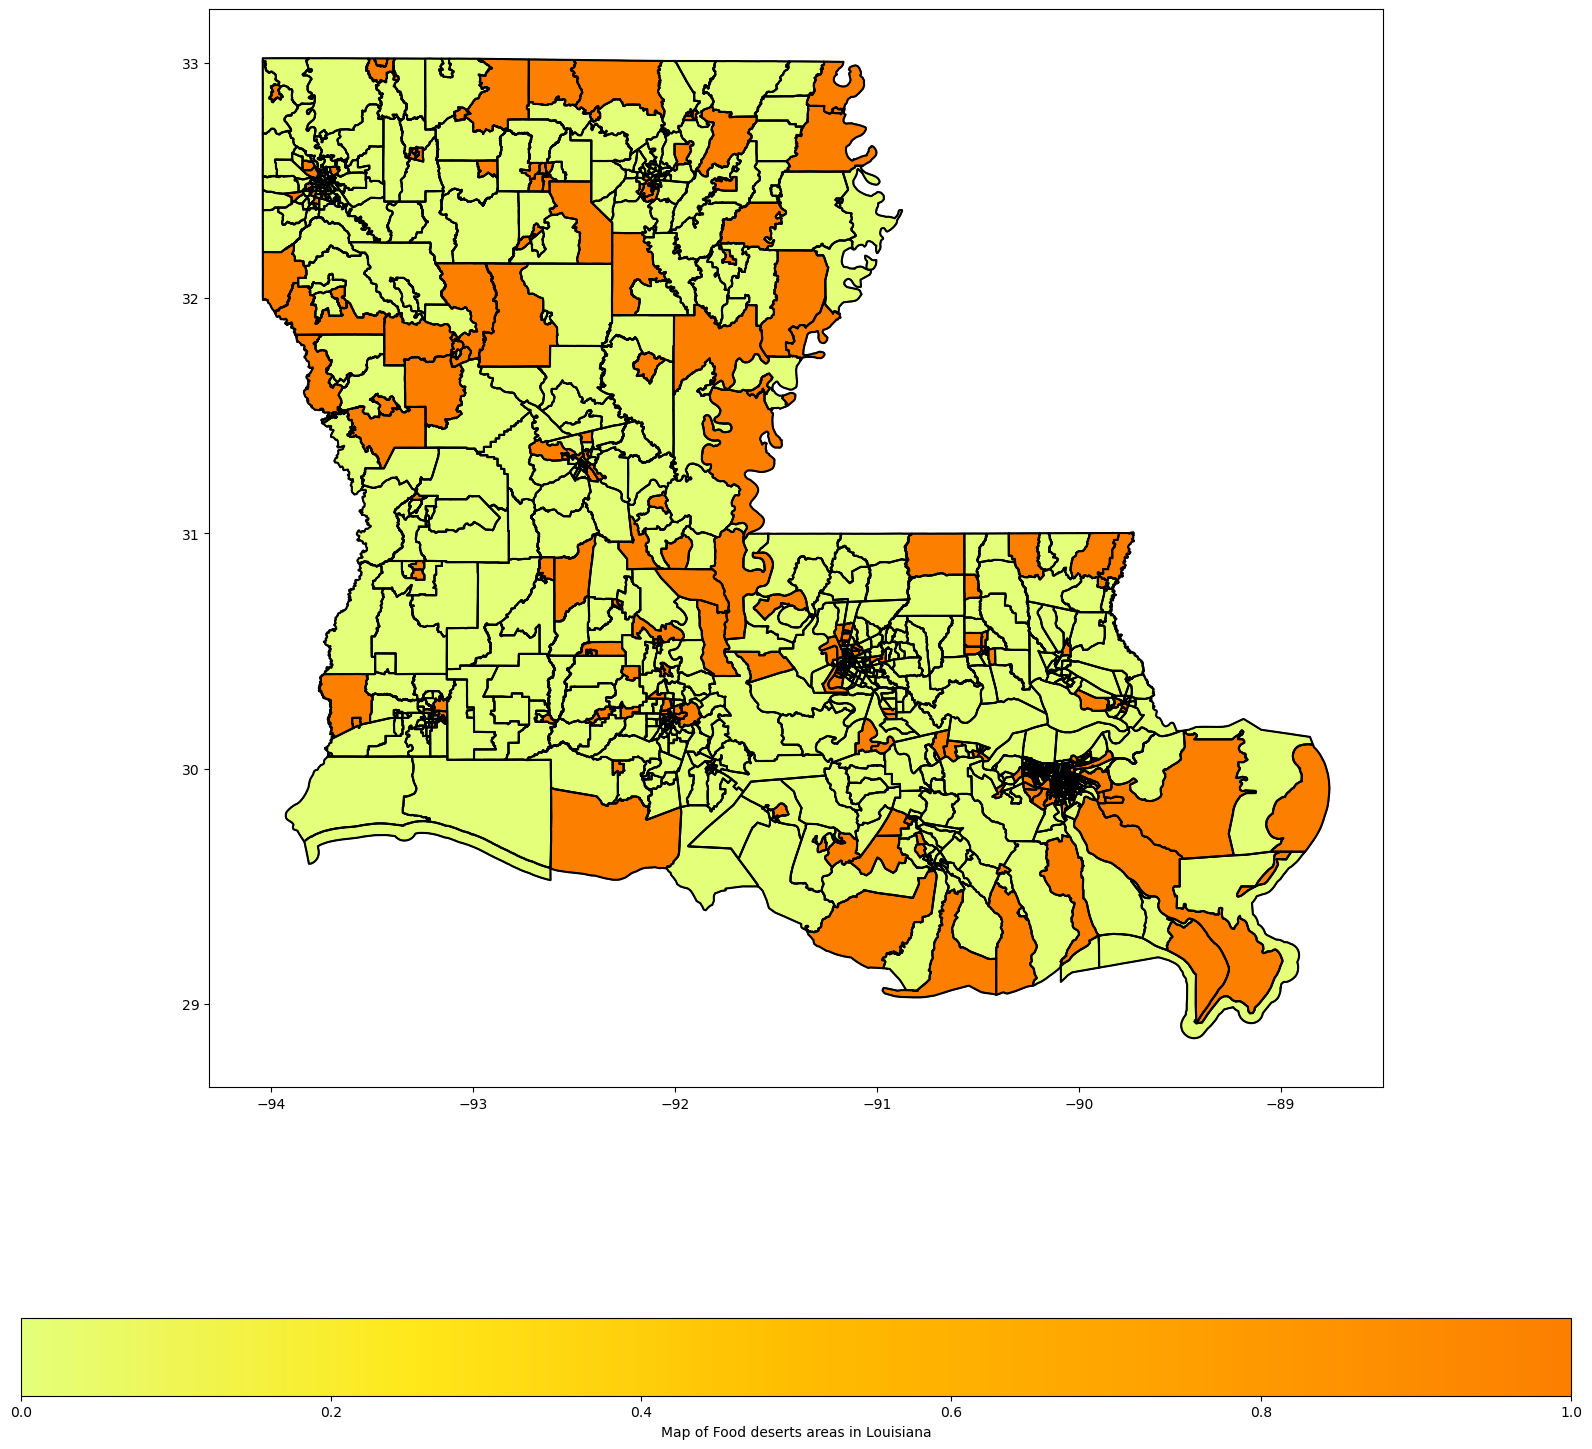

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 20))

ax= louisiana_food_deserts.plot(column="LILATracts_1And10",cmap='Wistia', ax=ax,legend=True,edgecolor = 'black',
           legend_kwds={"label":"Map of Food deserts areas in Louisiana", 'orientation':"horizontal"})
ax = louisiana_food_deserts.boundary.plot(ax=ax, color= "black" )
#ax = louisiana_food_deserts[louisiana_food_deserts['LILATracts_1And10']== 1].plot(ax=ax, color = "red",alpha = 0.6, edgecolor = 'white', linewidth = 3);
#ax = louisiana_food_deserts[louisiana_food_deserts['LILATracts_1And20']==1].plot(ax=ax, color = "red", edgecolor = 'white', linewidth = 3);


The visualization above is the map of Louisiana and shows the highlighed orange regions represent the food deserts in Louisiana. 


Now that there is a clear picture of the food desert regions in Louisiana, the next step would be to begin our exploratory analysis. The purpose of our project is to analyze if racial and ethnic minorities living in low-income communities are disproportionately affected by food insecurity among individuals who live in food deserts. 

The first step in this analysis would be to define the columns of interest to further expand our analysis. Due to our project scope stated above, variables like median income, poverty rate etc. are very important to this analysis because they are flags for low income, impoverished regions. Some other important variables for this analysis such as "Tract" variables i.e. the total population count of Black, White, Hispanic, Asian, etc. are necessary to show us how these groups of people are affected by food insecurity in food deserts. Another key variable to consider in this dataset is LILATracts_1And10. This measures the distance to the nearest source of fresh food like supermarkets for rural and urban areas in low-income areas which is an essential food desert flag. 

To get a quick overall view of our datasets summary statistics of some of the key variables that 

In [19]:
louisiana_food_deserts[["POP2010","LILATracts_1And10", 'PovertyRate', 'MedianFamilyIncome',
       'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV',
       'TractSNAP']].describe()

,POP2010,LILATracts_1And10,PovertyRate,MedianFamilyIncome,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,3966.204724,0.218723,21.646369,55288.585302,2481.357830,1270.687664,61.357830,1.717410,26.753281,124.330709,168.468941,129.072616,246.560805
std,2156.275387,0.413561,13.220124,26714.778624,2035.888553,1192.496397,123.786936,3.998218,81.456124,123.688217,209.098856,105.227420,176.852005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2370.500000,0.000000,11.750000,36250.000000,909.000000,360.000000,7.000000,0.000000,6.000000,48.000000,52.000000,53.000000,118.000000
50%,3646.000000,0.000000,19.100000,51667.000000,2120.000000,951.000000,21.000000,0.000000,12.000000,90.000000,106.000000,106.000000,216.000000
75%,5218.500000,0.000000,30.350000,68677.500000,3588.500000,1784.500000,65.500000,2.000000,23.000000,153.000000,200.000000,180.000000,338.500000
max,14446.000000,1.000000,82.800000,219107.000000,12751.000000,6239.000000,1795.000000,59.000000,2047.000000,1060.000000,2268.000000,989.000000,1196.000000


From the summary statistics, it was interesting that the mean poverty rate is shows as 21.64% while the mean Median family

income is $55,288.55 which means most Louisiana residents earn around $55,000 and the state's poverty rate is around 21.64%.

However, without knowing the distribution of counties, this doesn't really give much context to this. We would need to see a visual description of poverty rate v.s. the actual counties that can be counted as "low income"



Preliminary insights

Histograms are a good way to further explore the distribution in a dataset and since Median family income and Poverty rate are important determinant factors of a food desert. 

C:\Users\chiugo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MedianFamilyIncome', ylabel='Density'>

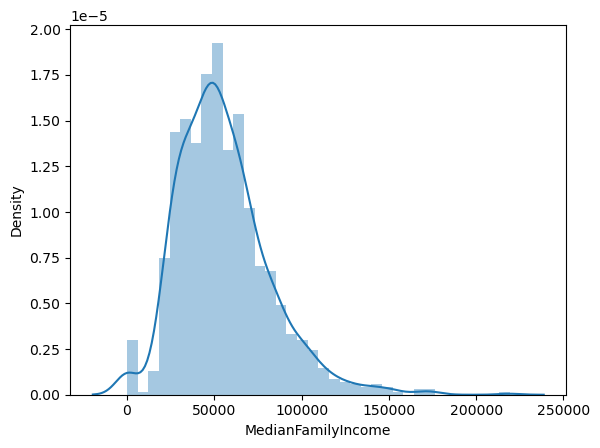

In [20]:
#Histogram of Median Family Income
sns.distplot(louisiana_food_deserts['MedianFamilyIncome'])


This is a positively skewed distribution.  The skewness is 1.10 which means it’s a bit positive skewed but not highly.  

This shows that most of the residents earn around $50,000 and but it drops off at $70,000 and a fewer residents make over 100,000

In [21]:
##skewness and kurtosis of Median Family Income

print("Skewness: %f" % louisiana_food_deserts['MedianFamilyIncome'].skew())
print("Kurtosis: %f" % louisiana_food_deserts['MedianFamilyIncome'].kurt())

Skewness: 1.103343
Kurtosis: 2.776073


C:\Users\chiugo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PovertyRate', ylabel='Density'>

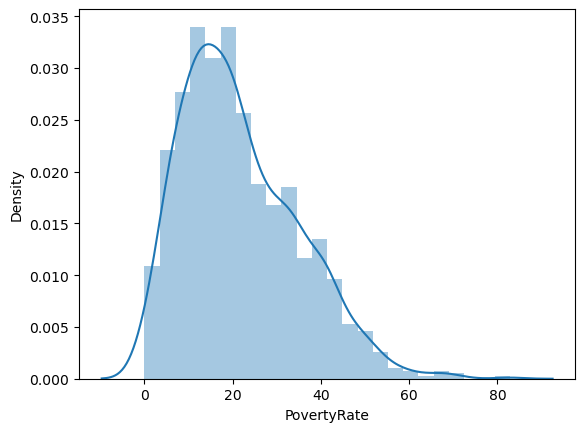

In [22]:
#Histogram of Poverty Rate
sns.distplot(louisiana_food_deserts['PovertyRate'])


This is also positively skewed which shows that poverty rate for most Louisiana residents is less than the mean of 21.64%. With the 20% being the rate indicative of low income regions, this is a good thing that fewer number of residents that have a higher poverty rate

In [23]:
#skewness and kurtosis of poverty rate
print("Skewness: %f" % louisiana_food_deserts['PovertyRate'].skew())
print("Kurtosis: %f" % louisiana_food_deserts['PovertyRate'].kurt())

Skewness: 0.773785
Kurtosis: 0.421462


In order to get a quick overview of the relationship of the datasets and any strong correlations of any dataset, the heatmap below was plotted:


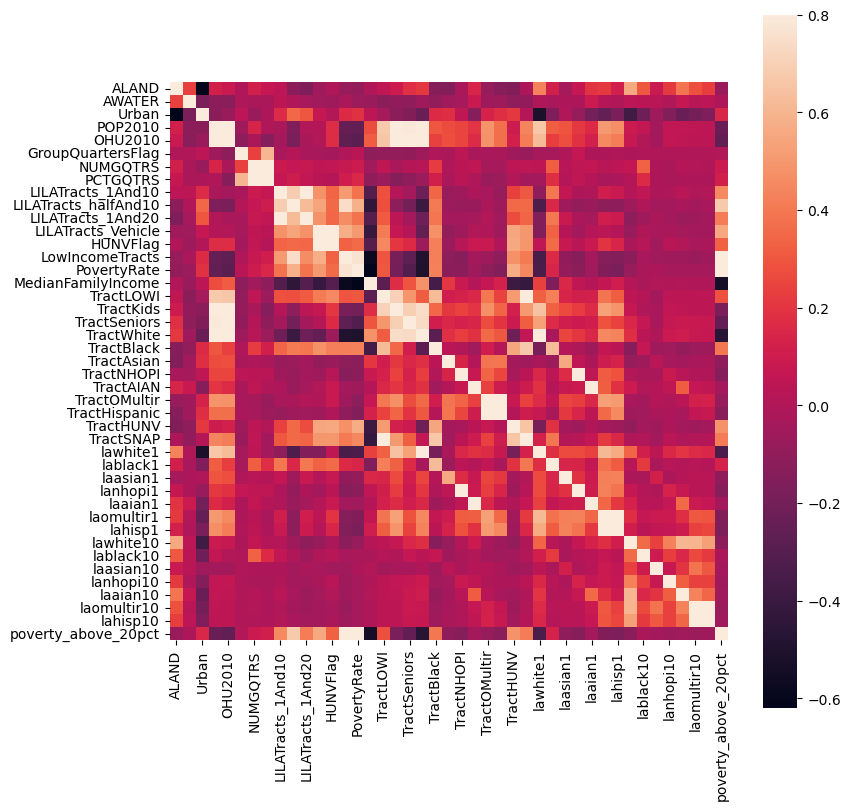

In [24]:
corrmat = louisiana_food_deserts.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Of the bat, there are some interesting correlations that poverty rate has with food desert indicator variables like the tracts distance to supermarkets and population tracts by race and ethnicity. 

To give some context on this variable: Poverty is measured by comparing a person's or family's income living to a set federal poverty threshold or minimum amount of income needed to cover basic needs. People whose income falls under their threshold are considered poor. Therefore, poverty rate is calculated by dividing the incomee in the past 12 months below poverty level by the total population living in a tract. As explained previously, areas with a poverty rate greater than 20% is one of the main flags that a region is a food desert. 
 
In order to look further into this below by plotting the heatmap solely on poverty rate to narrow the scope to total population and population tracts by race or ethnicity

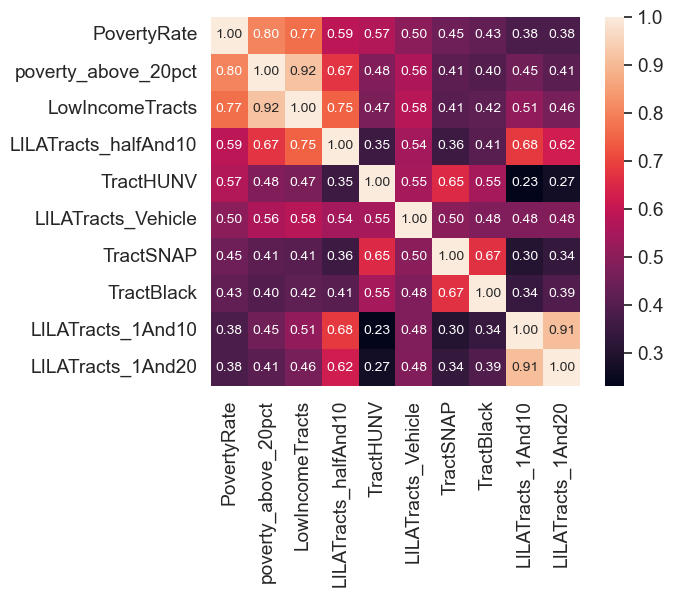

In [25]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PovertyRate')['PovertyRate'].index
cm = np.corrcoef(louisiana_food_deserts[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

It is clear from the heat map above that poverty ratee shows strong correlation with the population tracts and tracts/regions by race i.e., Tract White, Tract Asian, Tract Hispanic, Tract NHOPI(native indian) etc. 

To get a clearer look at the variables that are most positively correlated 

In [26]:
corrm = louisiana_food_deserts.corr()

pos_cor = corrm['PovertyRate'] >0
corrm['PovertyRate'][pos_cor].sort_values(ascending = False).to_frame()

,PovertyRate
PovertyRate,1.000000
poverty_above_20pct,0.801992
LowIncomeTracts,0.766682
LILATracts_halfAnd10,0.587199
TractHUNV,0.568292
LILATracts_Vehicle,0.504190
TractSNAP,0.449367
TractBlack,0.425487
LILATracts_1And10,0.383989
LILATracts_1And20,0.381756


and the variables that are negatively correlated with poverty rate:

In [27]:
corrm = louisiana_food_deserts.corr()

neg_cor = corrm['PovertyRate'] <0
corrm['PovertyRate'][neg_cor].sort_values(ascending = False).to_frame()

,PovertyRate
laasian10,-0.009892
lablack10,-0.017196
lahisp10,-0.033552
lanhopi10,-0.036357
laaian10,-0.036536
laomultir10,-0.036770
laaian1,-0.051188
TractAIAN,-0.058404
AWATER,-0.068587
lawhite10,-0.083758


So to further explore the relationships between these quantifiable variables, scatter plots are necessary. 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


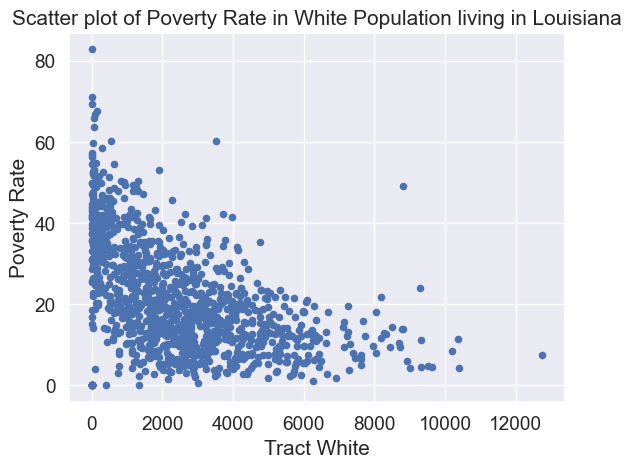

In [28]:
louisiana_food_deserts.plot(kind='scatter', x='TractWhite', y='PovertyRate')
plt.title("Scatter plot of Poverty Rate in White Population living in Louisiana")
plt.xlabel("Tract White") # Adding axis labels
plt.ylabel("Poverty Rate")
plt.show()

With a correlation coefficient of -0.51, the poverty rate has a moderately negative correlation with "Tract White" i.e., the white population residing in Louisiana. Barring the outliers, the above image shows that as the poverty rate reduces, the “tract white” increases. 

The outliers show 4,000 people with 60% poverty rate, 12,000 people with less than 10% poverty rate and 8,500 residents with 45% poverty rate. There could be many reasons for these outliers but in order to ascertain the cause, this can be further investigated by looking into their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of white people residing there. 


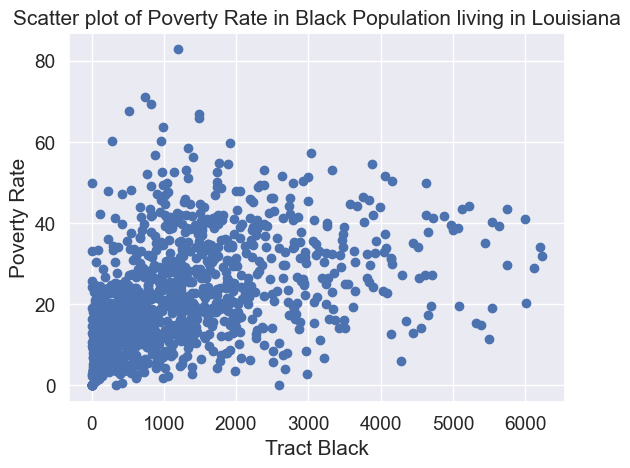

In [29]:
x = louisiana_food_deserts['TractBlack']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)
plt.title("Scatter plot of Poverty Rate in Black Population living in Louisiana")
plt.xlabel("Tract Black") # Adding axis labels
plt.ylabel("Poverty Rate")

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

Unlike with the situation above, poverty rate & black population is positively correlated. This means that, for the most part, both variables are directly related and both increase together without including the outliers. There are a few outlying data points where the poverty rate is above 60%, the highest one being slightly above 81%.  

The scatter plot above shows us that, in general, it seems that there are more black people that live at or above the poverty rate of 20%, which is flag for food deserts. However, the only way that This can be further investigated by looking into their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of black people residing there. 





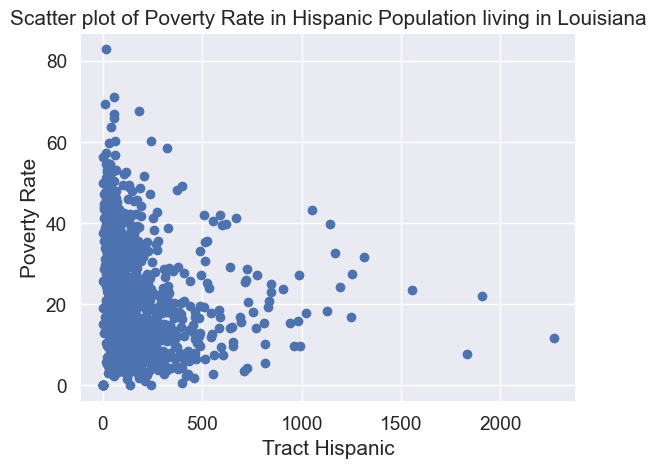

In [30]:
x = louisiana_food_deserts['TractHispanic']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)

plt.title("Scatter plot of Poverty Rate in Hispanic Population living in Louisiana")
plt.xlabel("Tract Hispanic") # Adding axis labels
plt.ylabel("Poverty Rate")
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

Although poverty rate and "Tract Hispanic" are negatively correlated, the coefficient of 0.15 show that this relationship is weak. This means that an increase in the poverty rate doesn't necessarily mean a corresponding decrease in the "Tract Hispanic", i.e., the number of people living in Louisiana that identify as Hispanic. 

While a dataset is bit clustered, based on the what this scatter plot shows us is that there are a few outlying data points where the poverty rate is above 60% and the Tract Hispanic greater than 1,500 people. The next step would be to further investigate their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of Hispanic people residing there.


















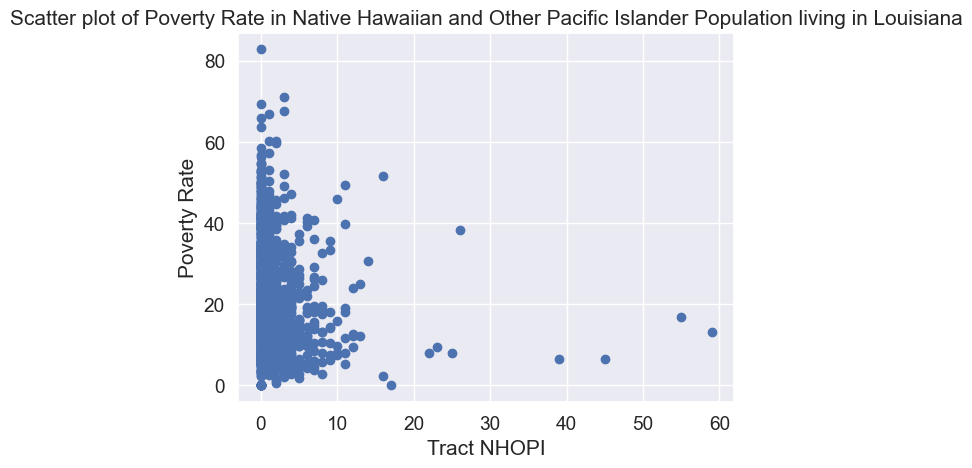

In [31]:
x = louisiana_food_deserts['TractNHOPI']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)
plt.title("Scatter plot of Poverty Rate in Native Hawaiian and Other Pacific Islander Population living in Louisiana")
plt.xlabel("Tract NHOPI") # Adding axis labels
plt.ylabel("Poverty Rate")
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

At first glance, the dataset seems disjointed and sparse. Although the correlation coefficient is 0.12, the image above shows a weak negative correlation at best. It seems that there are multiple outliers but because of how few the population data is, its hard to tell. There's not really much insight to gain from this so the next step wouldd be to investigated further by looking into their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of Native Indian people residing there.

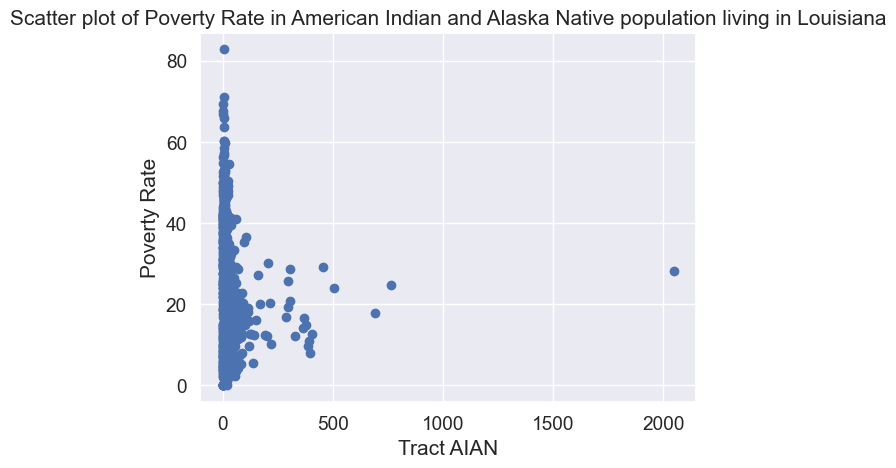

In [32]:
x = louisiana_food_deserts['TractAIAN']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)
plt.title("Scatter plot of Poverty Rate in American Indian and Alaska Native population living in Louisiana")
plt.xlabel("Tract AIAN") # Adding axis labels
plt.ylabel("Poverty Rate")

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

This dataset seems disjointed and sparse. The scatter plot above shows that the poverty rate has little to no correlation with Tract AIAN with a correlation coefficient of -0.06. ThereThere's not really much insight to gain from this so the next step would be to investigated further by looking into their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of American Indian people residing there.

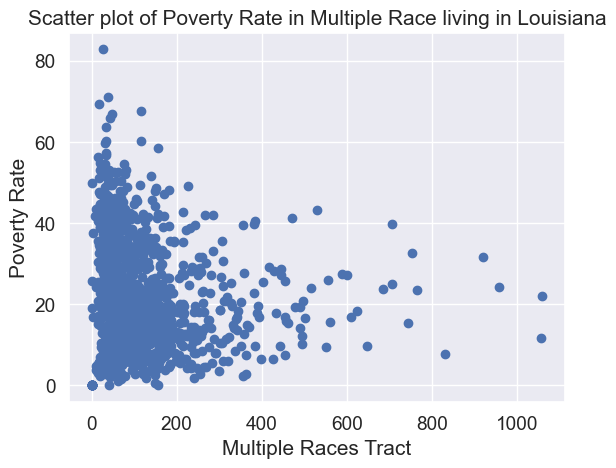

In [33]:
x = louisiana_food_deserts['TractOMultir']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)
plt.title("Scatter plot of Poverty Rate in Multiple Race living in Louisiana")
plt.xlabel("Multiple Races Tract") # Adding axis labels
plt.ylabel("Poverty Rate")

#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

Poverty rate and "Multiple races" tract have a weak negative correlation with a coefficient of 0.11. In this case, "Multiple races" mean the population tract that are not included in any one of the regular demographics like white, black or African-American, Asian, American Indian or Alaska Native, Asian, and Native Hawaiian or Other Pacific Islander race categories or who identify as more than one race. 

In this case, for example, a decrease in the poverty rate doesn't necessarily mean a corresponding increase in the "Tract multiple races", i.e., the number of people living in Louisiana that identify as more than one race.

This scatter plot shows us is that there are a few outlying data points where the poverty rate is above 60% and the Tract population  greater than 800 people. The next step would be to further investigate their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of this tract's population residing there.



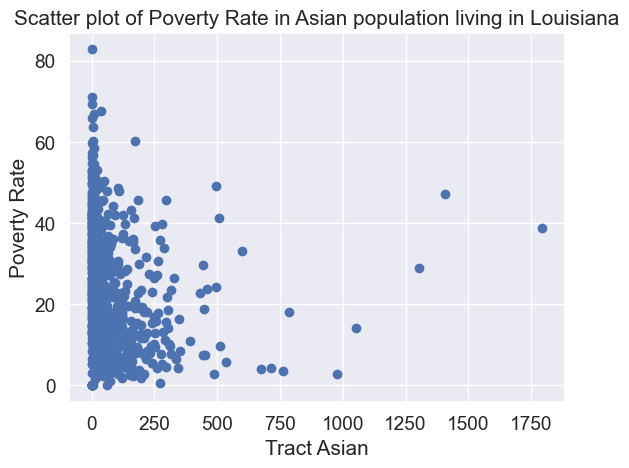

In [34]:
x = louisiana_food_deserts['TractAsian']
y = louisiana_food_deserts['PovertyRate']
plt.scatter(x, y)
plt.title("Scatter plot of Poverty Rate in Asian population living in Louisiana")
plt.xlabel("Tract Asian") # Adding axis labels
plt.ylabel("Poverty Rate")
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

plt.show()

Poverty rate and tract Asian also has a weak negative correlation with a coefficient of 0.11. In this case, for example, a decrease in the poverty rate doesn't necessarily mean a corresponding increase in the "Tract Asian".

This scatter plot shows us is that there are a few outlying data points where the poverty rate is above 60% and the Tract population greater than 750 people. The next step would be to further investigate their corresponding counties which would give more insight into what is happening in the low-income areas (specifically the food deserts) and the actual proportion of this tract's population residing there.

Overall, the scatterplot graphs above show how the population demographics by race relate to the poverty rate and there are some key takeaways to note:
- The black population tract is the only demographic that has a strong relationship (positive correlation) with poverty rate 
- Although every other tract has a negative correlation to poverty rates, the white population has the strongest inverse relationship with poverty rates by far at -0.50 compared to the others that range from -0.06- 0.15.  
- The American Indian community has the weakest correlation of -0.06, which shows little or no correlation to poverty rate. 
- Another interesting population tract is the "multiple race" demographic that had a weak negative correlation to poverty rate 
- Other races like Native Indian and both have sparse data which makes it difficult to really gain insights using the scatter plot

While this was useful for showing the how the dataset correlates, and how the poverty rate affects the population demographics, the core question that needs to be answered regarding our hypothesis is if racial/ethnic minorities are dispropotionally affected by food insecurity among those who live in food deserts. In order to have a clearer answer to this question, additional analysis of the "LILATracts_1And10" is required

In this dataset, "LILATracts_1And10" is the "food desert" variable that represents low income tracts with low access to fresh food sources, 1 mile from urban areas & 10 miles from rural areas. 0 represents regions that are "Not a food desert" and 1 as "food desert". Plotting bar graphs helps to compare the population demographics that reside in food desert regions or not. 






In [35]:
#Changed the data type from float to int just so it makes sense in the bar graph plotted below
louisiana_food_deserts["LILATracts_1And10"]= louisiana_food_deserts["LILATracts_1And10"].astype(int)

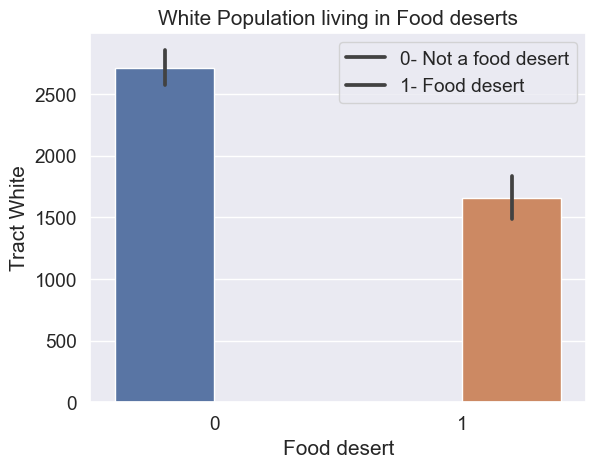

In [36]:
sns.barplot(x="LILATracts_1And10", y="TractWhite", hue="LILATracts_1And10", data=louisiana_food_deserts)
#sns.set(rc={'figure.figsize':(8.7,8.27)})
plt.title("White Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract White")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

The graph above shows that in general, more people that identify as "White".about 2,700,  live in non-food desert regions while about 1,700 of them live in regions that are classified as food deserts. This means that most white people in Louisiana( over 60%) do not reside in food deserts areas. 


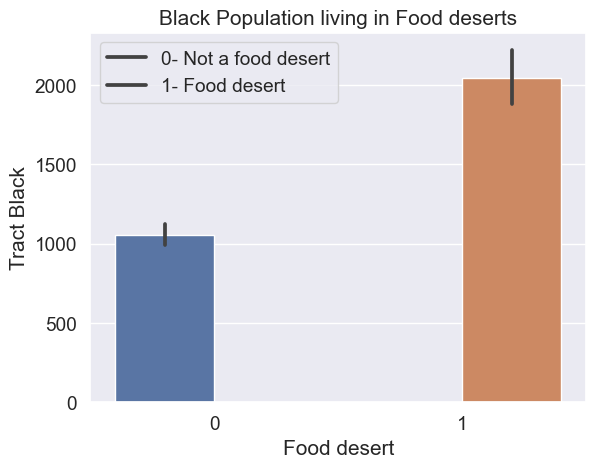

In [37]:
sns.barplot(x="LILATracts_1And10", y="TractBlack", hue="LILATracts_1And10", data=louisiana_food_deserts)
#sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.title("Black Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract Black")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

However, the image above is completely different from that of the white population. For the black community in Louisiana, it seems about 2,100 people live in food deserts compared to the 1,100 people that do not. Basically, 34% of the black population live in areas that are not food deserts while the other 66% live in food desert regions.

The fact that there are more black people live in low-income & low access regions (food deserts)  supports our hypothesis that racial minorities are more affected than other ethnic majority groups.

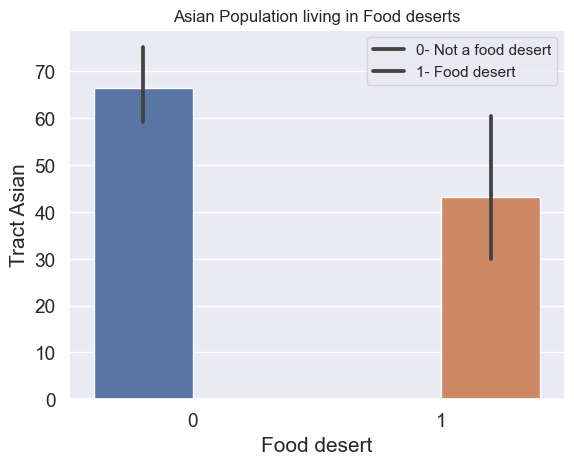

In [38]:
sns.barplot(x="LILATracts_1And10", y="TractAsian", hue="LILATracts_1And10", data=louisiana_food_deserts)
sns.set(rc={'figure.figsize':(13.7,8.27)})
plt.title("Asian Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract Asian")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

The image shows that 66 people that identify as "Asian" live in areas that are not food deserts v.s. 42 people that live in food deserts. Basically, 39% of the Asian population live in areas that are not food deserts while the other 61% live in food desert regions. Although Asians are a racial and ethnic minority group, in this case, a majority of the Asian community in Louisiana  don't live in food deserts. 

This does not necessarily validate our hypothesis since a majority of this community live in non-food desert regions. The next step would be to visualize the counties that are food deserts and compare the number of population demographics by race that stay there. This would allow us to further see by county the effects of food deserts on the minority groups. 

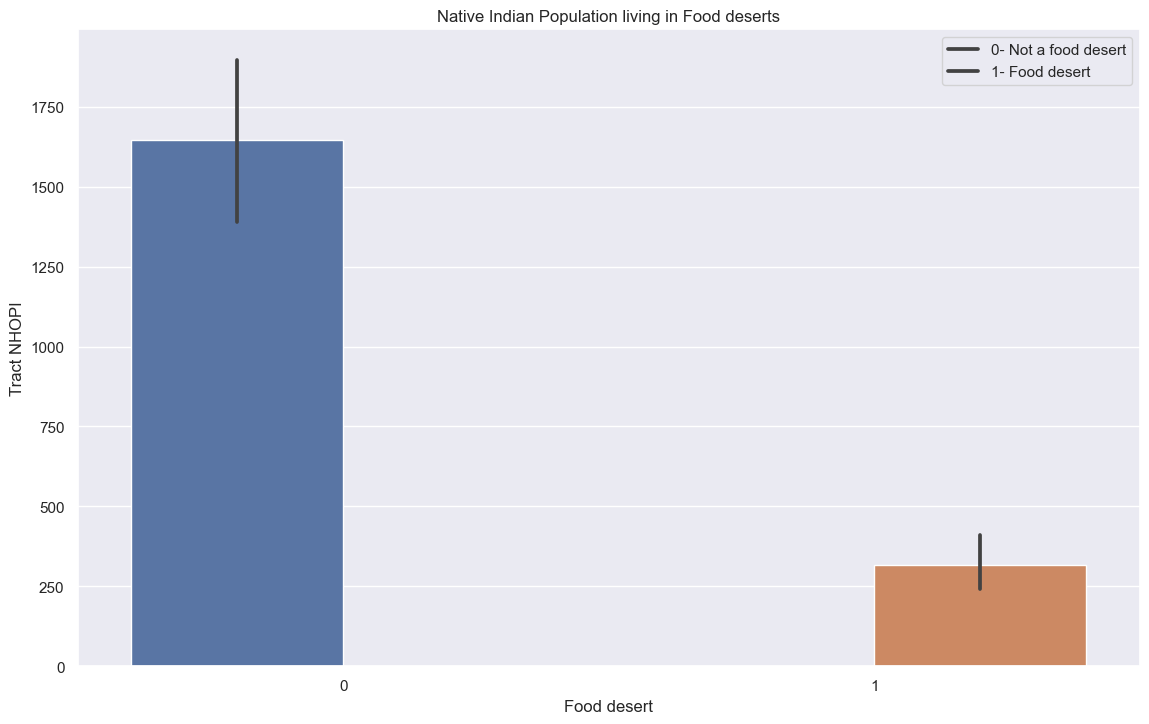

In [39]:
sns.barplot(x="LILATracts_1And10", y="TractNHOPI", hue="LILATracts_1And10", data=louisiana_food_deserts,estimator=sum)
sns.set(rc={'figure.figsize':(13.7,8.27)})
plt.title("Native Indian Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract NHOPI")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

This is interesting that although native indians are an ethnic minority, they have vastly different results compared to the other minorities. Here, majority of the native indian residents do not live in food deserts , almost 85%, while less than 300 people live in food deserts. 

This doesn't support our hypothesis stated earlier but additional analysis can be done on the outliers in this dataset and the corresponding counties if there's any trends there.

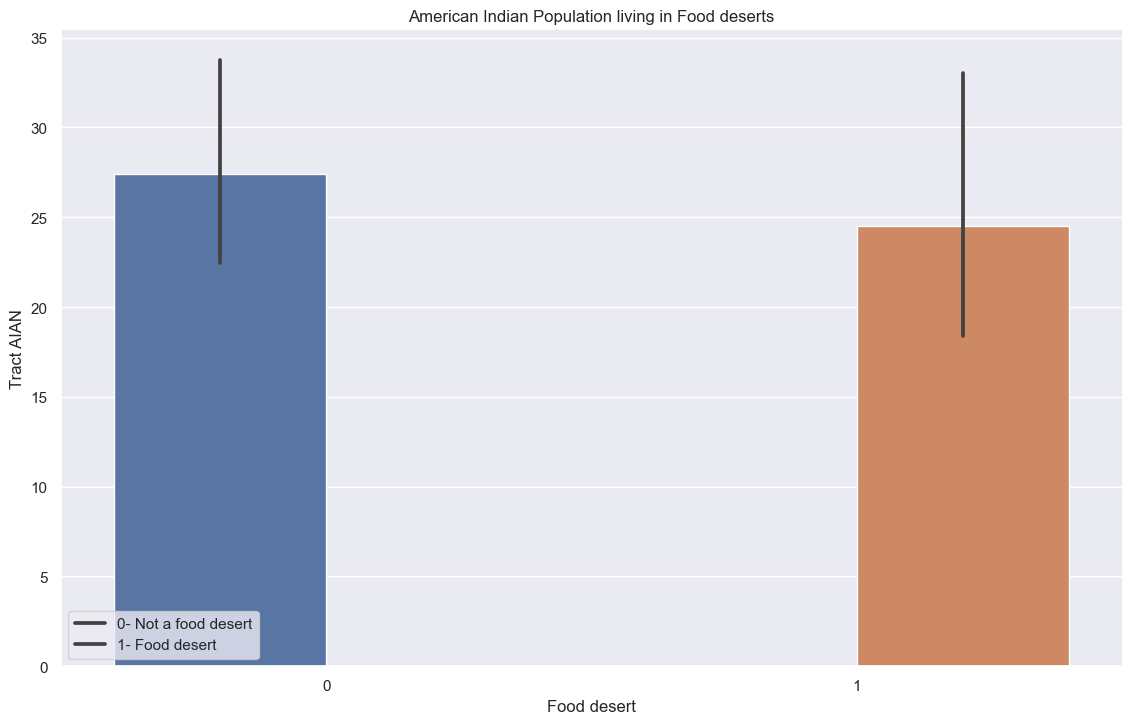

In [40]:
sns.barplot(x="LILATracts_1And10", y="TractAIAN", hue="LILATracts_1And10", data=louisiana_food_deserts)
sns.set(rc={'figure.figsize':(13.7,8.27)})
plt.title("American Indian Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract AIAN")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

The image shows that American Indian population living in Louisiana that reside in food deserts v.s. those that do not live there are very close. About 24 members of the community live in food deserts while the other 27 people don't live in food deserts. 

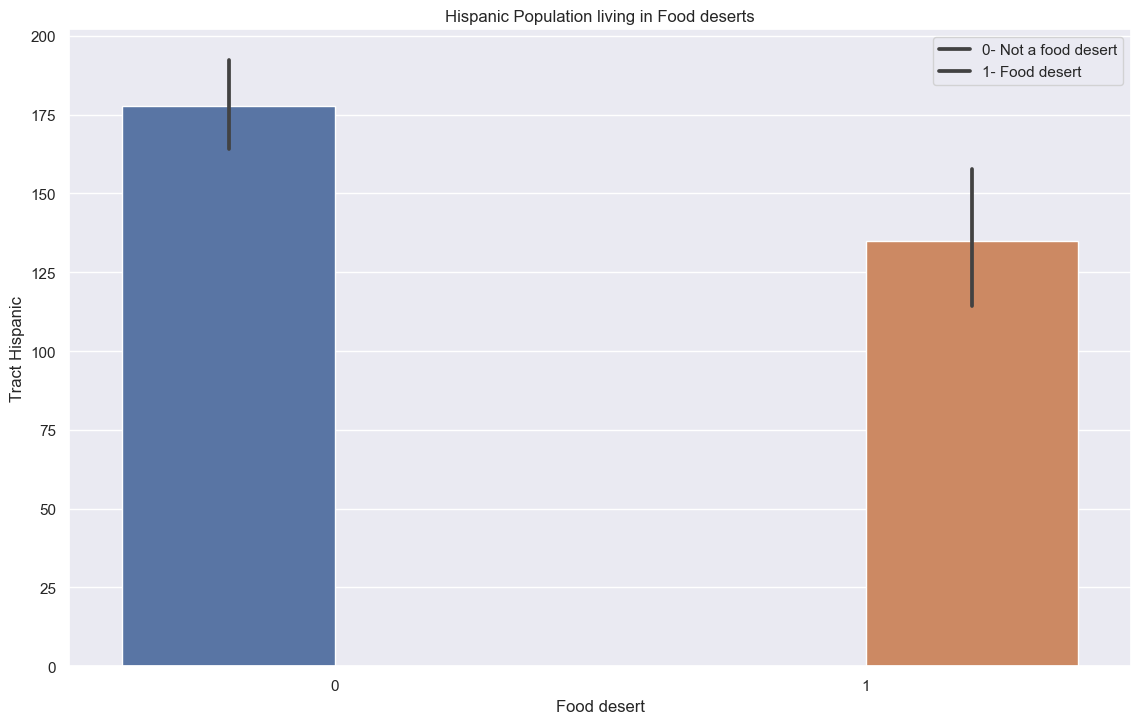

In [41]:
sns.barplot(x="LILATracts_1And10", y="TractHispanic", hue="LILATracts_1And10", data=louisiana_food_deserts)
plt.title("Hispanic Population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract Hispanic")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

The image shows that 175 people that identify as "Hispanic" live in areas that are not food deserts v.s. 130 people that live in food deserts. 57% of the Hispanic population live in areas that are not food deserts while the other 43% live in food desert regions. 

Although a higher proportion of the Hispanic population live in non-food desert areas, it is by a small margin so it would be interesting to see the outliers especially in the food desert data set to look into it further before deciding if it supports or disproves our hypothesis.

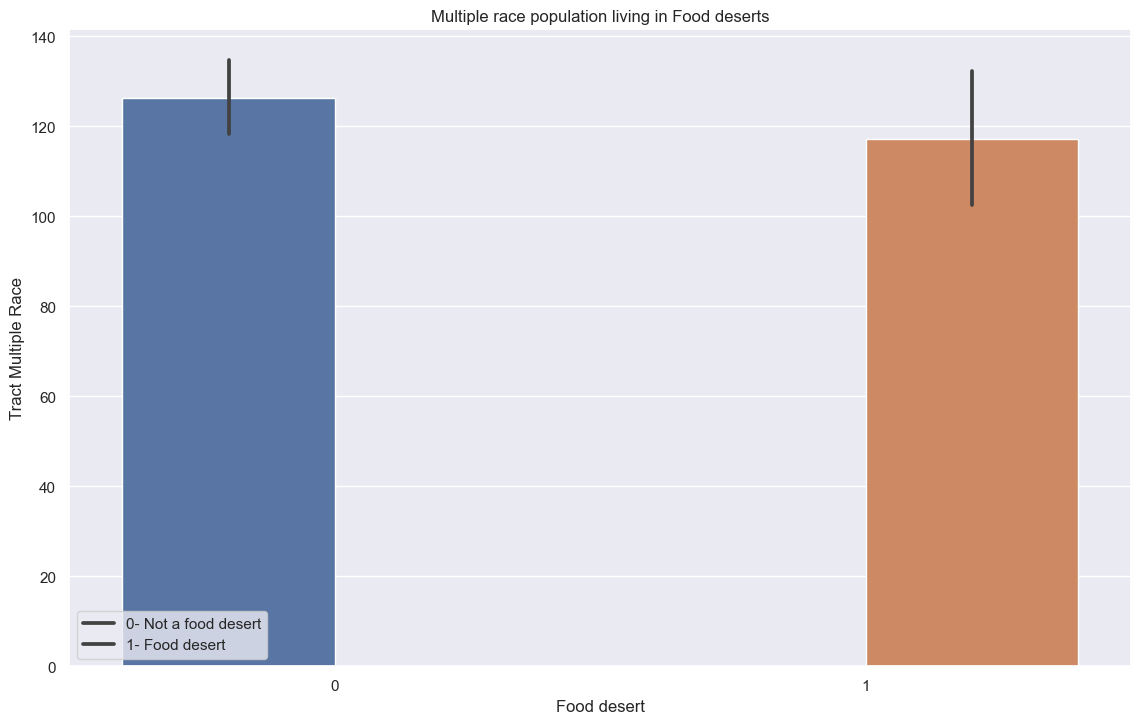

In [42]:
sns.barplot(x="LILATracts_1And10", y="TractOMultir", hue="LILATracts_1And10", data=louisiana_food_deserts)
plt.title("Multiple race population living in Food deserts")
plt.xlabel("Food desert") # Adding axis labels
plt.ylabel("Tract Multiple Race")
plt.legend(labels=["0- Not a food desert", "1- Food desert"])

This graph shows that most of the people that identify as multiple or mixed race, about 51%, do not live in food desert while the other 49% live in food deserts. Multiple race is an interesting segment because it can contain a multitude of combinations of the other racial identities summarized in one classification. This is where intersectionality comes to play.

Overall, the bar graphs above show the proportion of the population demographics by race that live in a food desert and those who do not:

- The black population tract is the only minority group that had a majority of their community that resides in food deserts which is in line with the result of the scatter plot graph which showed that this community had a positive correlation with  the poverty rate. 

- Although the Multiple race, Hispanic, and American Indian communities had a majority of their community members not living in food deserts, it was by a small margin for example,multiple races had 51% living in non-food desert regions and 49% living in food deserts. This shows that though not as severe as that of the black community, there is still a substantial amount of people in these communities that  have low income & low access to fresh food sources. This doesn’t necessarily invalidate our hypothesis but further investigation on the outlier variables as well as their corresponding counties would be necessary. 

- It is interesting that although the Native Indian & Hawaiian population tracts are a minority group, they have almost 85% of their community living in non-food deserts  so this definitely does not support the previously stated  hypothesis. 

- Ultimately, among the minority groups, the black population tract in Louisiana definitely has it worst with a huge proportion of the community living in food deserts which shows that even among minority groups, not all communities are as affected by food deserts. 


These bar graphs above show us that a higher percentage of the minority groups, especially the black community, are deeply affected by or live in food deserts in comparison to the white population. 

As an extension to the exploratory data analysis that our team conducted, we wanted to gain a better understanding of the differences among demographics  living in food desert regions  (i.e., areas where residents lack access to healthy and nutritious food). This is usually for residents that live in urban areas, 1 mile away from the nearest supermarket, and for those who reside  in rural areas, 10 miles away from the nearest supermarket/grocery store. Our goal is to see if there are any statistical differences between the white population in Louisiana that live in rural and urban tracts or regions, either 1 or 10 miles away from the supermarket. 

In order to ascertain this, a hypothesis(t-test) was run on the distance to supermarkets for the minority population versus the majority population (white) for both urban and rural parishes in Louisiana. 



Firstly We are melting the original dataframes since the original louisiana food deserts file is a shape file which is incompatible for running the tests

In [48]:
#Created a new dataframe for distance to supermarket for the white population in urban areas
white_supermarket_dist_urban= louisiana_food_deserts["lawhite1"].to_frame()
white_supermarket_dist_urban=white_supermarket_dist_urban.melt(value_name = "white_dist_to_supermarket")
white_supermarket_dist_urban= white_supermarket_dist_urban.drop(columns= ["variable"])

In [54]:
#Created a new dataframe for distance to supermarket for the non-white population in urban areas
nonwhite_supermarket_dist_urban= louisiana_food_deserts[["lablack1",
            "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1"]]
nonwhite_supermarket_dist_urban= nonwhite_supermarket_dist_urban.melt(value_name = "non-white_dist_to_supermarket")
nonwhite_supermarket_dist_urban= nonwhite_supermarket_dist_urban.drop(columns= ["variable"])

In [55]:
#Created a new dataframe for distance to supermarket for the white population in rural areas
white_supermarket_dist_rural= louisiana_food_deserts["lawhite10"].to_frame()
white_supermarket_dist_rural=white_supermarket_dist_rural.melt(value_name = "white_dist_to_supermarket")
white_supermarket_dist_rural= white_supermarket_dist_rural.drop(columns= ["variable"])

In [56]:
#Created a new dataframe for distance to supermarket for the non-white population in rural areas
nonwhite_supermarket_dist_rural= louisiana_food_deserts[["lablack10","laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10"]]
nonwhite_supermarket_dist_rural= nonwhite_supermarket_dist_rural.melt(value_name = "non-white_dist_to_supermarket")
nonwhite_supermarket_dist_rural= nonwhite_supermarket_dist_rural.drop(columns= ["variable"])

To measure the statistical significance, we re comparing the each minority group to the white population living in Louisiana (both urban and rural) regions 

In [52]:
pg.ttest(white_supermarket_dist_urban["white_dist_to_supermarket"], nonwhite_supermarket_dist_urban["non-white_dist_to_supermarket"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,23.475684,1159.688409,two-sided,5.059997e-100,"[1155.73, 1366.53]",1.631793,9.409e+113,1.0


The p-value shown above shows less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that in urban areas, the distance to supermarkets for the white population living in Louisiana is statistically different from the distance to supermarket for the non-white community (including the black, asian, american & Hawaiian indian, Hispanic communities ).

The table below shows the results for the population living in rural areas;


In [57]:
pg.ttest(white_supermarket_dist_rural["white_dist_to_supermarket"], nonwhite_supermarket_dist_rural["non-white_dist_to_supermarket"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.959933,1150.592803,two-sided,4.100997e-15,"[79.25, 131.1]",0.585902,1.621e+12,1.0


The p-value shown above shows less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that in rural areas, the distance to supermarkets for the white population living in Louisiana is statistically different from the distance to supermarkets for the non-white community (including the Black, Asian, American & Hawaiian Indian, and Hispanic communities).

The results above conclude that in both rural and urban regions, there are statistically significant differences in the distance to supermarkets for the white and minority populations living in Louisiana. 


To further explore the relationship between the food desert variable and population tracts, running a logistic regression would be valuable to accept or reject our hypothesis.

sources

https://www.medicalnewstoday.com/articles/what-are-food-deserts#definition

https://www.ers.usda.gov/data-products/food-access-research-atlas/documentation/

Food desert definition inspired by https://www.kaggle.com/code/raomahesh/nashville-food-deserts/notebook
